In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np



In [2]:
dataFrame = pd.read_csv("data/robertaOutlires2.csv")
print(dataFrame.dtypes)
dataFrame.head()

review     object
rating      int64
neg       float64
neu       float64
pos       float64
result     object
dtype: object


,review,rating,neg,neu,pos,result
0,Absolutely wonderful - silky and sexy and comf...,4,0.002245,0.010576,0.987180,pos
1,Love this dress! it's sooo pretty. i happene...,5,0.001609,0.007436,0.990955,pos
2,I had such high hopes for this dress and reall...,3,0.366803,0.380140,0.253057,neu
3,"I love, love, love this jumpsuit. it's fun, fl...",5,0.002247,0.004622,0.993131,pos
4,This shirt is very flattering to all due to th...,5,0.001239,0.006733,0.992028,pos


In [3]:
def showValueCounts(dataFrame):
    print(dataFrame["rating"].value_counts())
    plt.figure(figsize=(3, 2))  
    dataFrame["rating"].value_counts().plot(
        kind='bar', 
        color=['blue', 'green', 'red'], 
        alpha=0.7, 
        edgecolor='black'
    )
    plt.title("Rating Distribution")  
    plt.xlabel("Ratings")  
    plt.ylabel("Frequency")  
    plt.tight_layout()  
    plt.show()
    

rating
5    12287
4     4647
2     1013
1      522
3      414
Name: count, dtype: int64


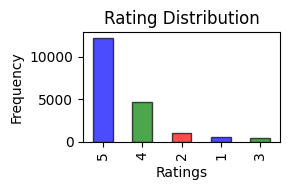

In [4]:
showValueCounts(dataFrame)

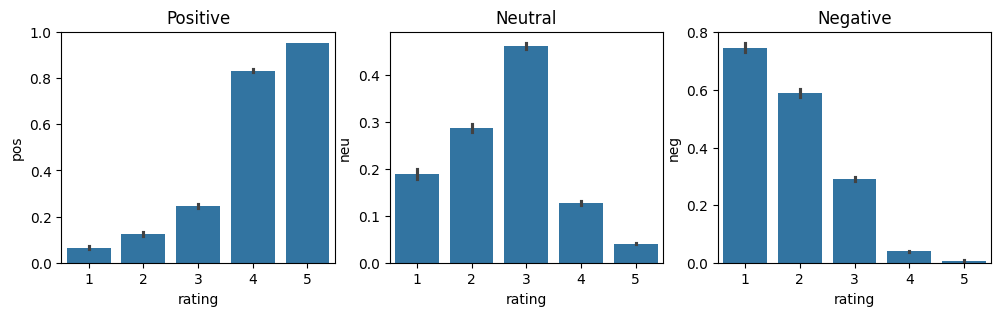

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=dataFrame, x='rating', y='pos', ax=axs[0]) 
sns.barplot(data=dataFrame, x='rating', y='neu', ax=axs[1])
sns.barplot(data=dataFrame, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

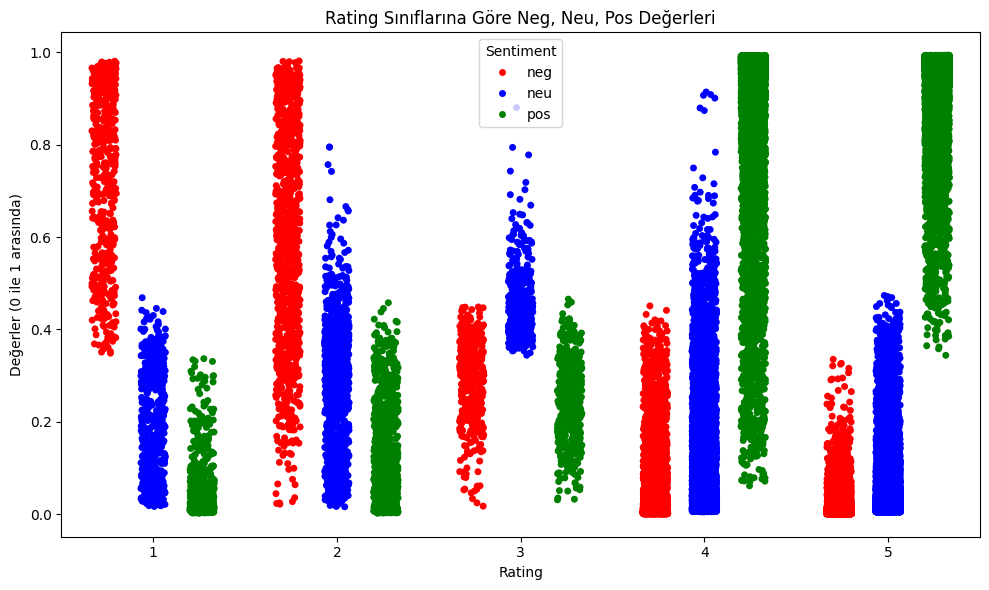

In [6]:
df_melted = dataFrame.melt(id_vars=["rating"], value_vars=["neg", "neu", "pos"],
                    var_name="Sentiment", value_name="Değer")


plt.figure(figsize=(10, 6))
sns.stripplot(
    x="rating",
    y="Değer",
    hue="Sentiment",
    data=df_melted,
    dodge=True,  
    jitter=0.2,  
    palette={"neg": "red", "neu": "blue", "pos": "green"}
)


plt.xlabel("Rating")
plt.ylabel("Değerler (0 ile 1 arasında)")
plt.title("Rating Sınıflarına Göre Neg, Neu, Pos Değerleri")
plt.legend(title="Sentiment")
plt.tight_layout()

plt.show()

# classification

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## smote

In [8]:
encode_map = {'pos': 2, 'neu': 1, 'neg': 0}
dataFrame['result'] = dataFrame['result'].map(encode_map)

In [9]:
X = dataFrame[["result","neg","neu","pos"]]
Y = dataFrame["rating"]
randomState = 42

In [10]:
rus = RandomUnderSampler(random_state=randomState,sampling_strategy={5:1000,4:1000})
X, Y = rus.fit_resample(X, Y)

In [11]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=randomState,stratify=Y)

In [12]:
y_train.value_counts()

rating
2    709
4    700
5    700
1    365
3    290
Name: count, dtype: int64

In [13]:
#smote_nc = SMOTE(sampling_strategy={1:500,2:800,3:400}) 
smote_nc = SMOTE(sampling_strategy={1:500,3:400}) 
x_train, y_train = smote_nc.fit_resample(x_train, y_train) 

In [14]:
y_train.value_counts()

rating
2    709
4    700
5    700
1    500
3    400
Name: count, dtype: int64

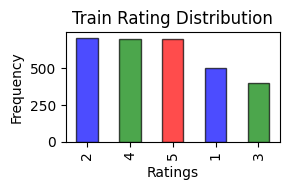

In [15]:
plt.figure(figsize=(3, 2))  
y_train.value_counts().plot(
    kind='bar', 
    color=['blue', 'green', 'red'], 
    alpha=0.7, 
    edgecolor='black'
)
plt.title("Train Rating Distribution")  
plt.xlabel("Ratings")  
plt.ylabel("Frequency")  
plt.tight_layout()  
plt.show()

Accuracy: 0.5907172995780591


c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


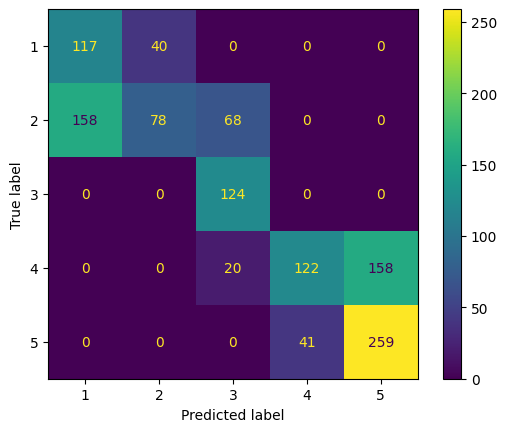

              precision    recall  f1-score   support

           1       0.43      0.75      0.54       157
           2       0.66      0.26      0.37       304
           3       0.58      1.00      0.74       124
           4       0.75      0.41      0.53       300
           5       0.62      0.86      0.72       300

    accuracy                           0.59      1185
   macro avg       0.61      0.65      0.58      1185
weighted avg       0.63      0.59      0.56      1185



In [16]:
model=LogisticRegression(random_state=randomState,class_weight="balanced") 
model.fit(x_train, y_train )  
y_pred = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

cm = confusion_matrix(y_test, y_pred,labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3,4,5])
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

#hyper

In [18]:
del y_pred

In [17]:
#model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=5000)
model = LogisticRegression(random_state=randomState,class_weight="balanced",multi_class='multinomial', solver='saga', max_iter=5000) 
#model = LogisticRegression()

In [18]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', None],  
    'solver': ['saga'],  
    'l1_ratio': [0.0, 0.5, 1.0] 
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,  
    verbose=2,
    n_jobs=-1
)


grid_search.fit(x_train, y_train)


print("En İyi Hiperparametreler:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)



Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


En İyi Hiperparametreler: {'C': 100, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'saga'}


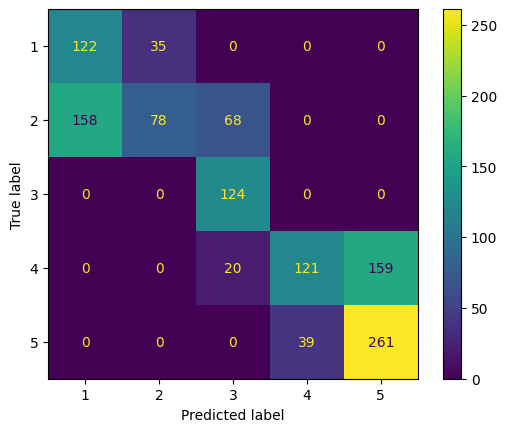

              precision    recall  f1-score   support

           1       0.44      0.78      0.56       157
           2       0.69      0.26      0.37       304
           3       0.58      1.00      0.74       124
           4       0.76      0.40      0.53       300
           5       0.62      0.87      0.72       300

    accuracy                           0.60      1185
   macro avg       0.62      0.66      0.58      1185
weighted avg       0.64      0.60      0.56      1185



In [19]:
cm = confusion_matrix(y_test, y_pred,labels=[1,2,3,4,5])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3,4,5])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

## basic

In [21]:
encode_map = {'pos': 2, 'neu': 1, 'neg': 0}
dataFrame['result'] = dataFrame['result'].map(encode_map)

In [32]:
X = dataFrame[["result","neg","neu","pos"]]
Y = dataFrame["rating"]
randomState=42
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=randomState)


In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
model=LogisticRegression(random_state=randomState,class_weight="balanced") 

#model = lgb.LGBMClassifier(random_state=randomState,class_weight="balanced") 
#model = RandomForestClassifier()
#model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7209179170344219

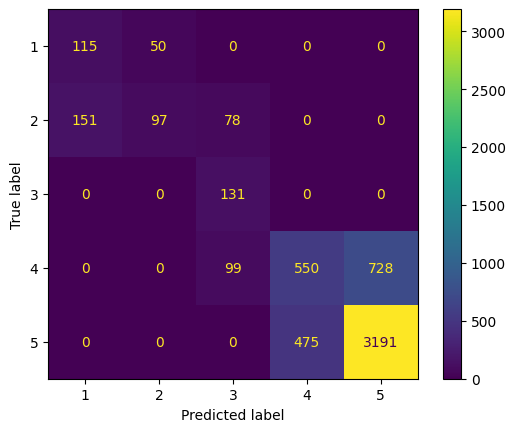

              precision    recall  f1-score   support

           1       0.43      0.70      0.53       165
           2       0.66      0.30      0.41       326
           3       0.43      1.00      0.60       131
           4       0.54      0.40      0.46      1377
           5       0.81      0.87      0.84      3666

    accuracy                           0.72      5665
   macro avg       0.57      0.65      0.57      5665
weighted avg       0.72      0.72      0.71      5665



In [35]:
cm = confusion_matrix(y_test, y_pred,labels=[1,2,3,4,5])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3,4,5])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

In [36]:
import joblib

joblib.dump(best_model, 'models/logistic_regression_model.pkl')


['models/logistic_regression_model.pkl']

hyper


In [24]:
model = LogisticRegression()

In [25]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'solver': ['saga'],  
    'l1_ratio': [0.0, 0.5, 1.0], 
    "random_state":[randomState],
    "class_weight":["balanced"],
    "multi_class":['multinomial'], 
    "max_iter":[5000]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,  
    verbose=2,
    n_jobs=-1
)


grid_search.fit(x_train, y_train)


print("En İyi Hiperparametreler:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)



Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


En İyi Hiperparametreler: {'C': 10, 'class_weight': 'balanced', 'l1_ratio': 0.0, 'max_iter': 5000, 'multi_class': 'multinomial', 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}


c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


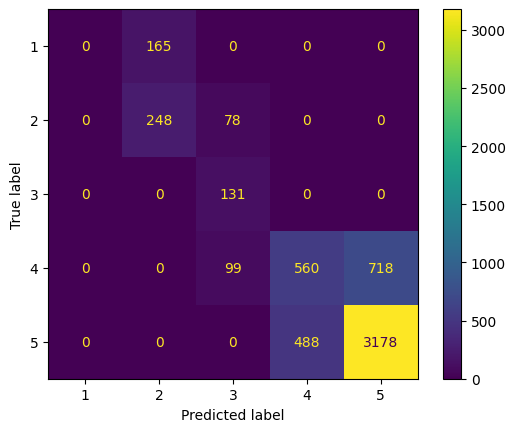

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       165
           2       0.60      0.76      0.67       326
           3       0.43      1.00      0.60       131
           4       0.53      0.41      0.46      1377
           5       0.82      0.87      0.84      3666

    accuracy                           0.73      5665
   macro avg       0.48      0.61      0.51      5665
weighted avg       0.70      0.73      0.71      5665



c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emrul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [26]:
cm = confusion_matrix(y_test, y_pred,labels=[1,2,3,4,5])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3,4,5])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

In [27]:
best_model

LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.0, max_iter=5000,
                   multi_class='multinomial', penalty='l1', random_state=42,
                   solver='saga')